# Task 1
Gating-variables are used to describe the configurational state of proteins (i.e. *open, closed, inactive*) of the respective ion channel. Based on these states the conductivity of the ion channel may change. Gating-variables are dependent on time and voltage. According to Hodgkin and Huxley, this dependency on time and voltage can be described as:

#### Potassium Current:
<center> $\alpha_n = 0.01 \frac{ -(V+55)}{\exp(\frac{-(V+55)}{10}) - 1}$ </center>
<center> $\beta_n = 0.125 \exp(\frac{-(V+65)}{80})$ </center>

#### Sodium Current (Activation Gate):
<center> $\alpha_m = 0.1 \frac{ -(V+40)}{\exp(\frac{-(V+40)}{10}) - 1}$ </center>
<center> $\beta_m = 4 \exp(\frac{-(V+65)}{18})$ </center>

#### Sodium Current (Inactivation Gate):
<center> $\alpha_h = 0.07 \exp(\frac{-(V+65)}{20})$ </center>
<center> $\beta_h = \frac{ 1}{\exp(\frac{-(V+35)}{10}) + 1}$ </center>

### Task:
Implement the equations in python as follows:
- Use a for-loop to investigate the voltages ranging from 100mV to +40mV
- For each voltage, calculate the rate constants for potassium and sodium,  $\alpha_n$,  $\beta_n$,  $\alpha_m$, $\beta_m$,  $\alpha_h$, $\beta_h$
- Plot your results in a graph.

# Your Implementation
### Preamble
This is the place to put import statements for the modules that you want to use in your code.

In [1]:
from math import exp
from matplotlib import pyplot as plt

### Initialization
Initialize a list containing the transmembrane voltages of the clamp protocol you're going to simulate.
Create variables of the same size to hold the gating variables at each voltage step.

In [2]:
Vclamp = [v for v in range(-100, 41, 5)]

In [3]:
# There are several ways to accomplish this:
alpha_n = list(Vclamp)
beta_n  = [0 for v in Vclamp]

alpha_m = [0 for v in range(-100, 41, 5)]
beta_m  = list(range(-100, 41, 5))

alpha_h = list(Vclamp)
beta_h  = list(Vclamp)

### Gating Variable Calculation
Implement the calculation of the gating variables for the voltage steps.

In [4]:
for i, v in enumerate(Vclamp):
    if v == -55:
        alpha_n[i] = 0.1
    else:
        alpha_n[i] = 0.01 * -(v+55) / (exp(-(v+55)/10) - 1)
    beta_n[i]  = 0.125 * exp( -(v+65) / 80)

    if v == -40:
        alpha_m[i] = 1
    else:
        alpha_m[i] = 0.1 * -(v+40) / (exp(-(v+40)/10) - 1)
    beta_m[i]  = 4 * exp(-(v+65) / 18)

    alpha_h[i] = 0.07 * exp(-(v+65)/20)
    beta_h[i]  = 1 / (exp(-(v+35)/10) + 1)
    
# Note: wenn Zaehler gegen 0 muesste man eig. mit l'Hospital aber man kann auch nicht an Stelle direkt sondern bisschen daneben

### Plotting of Results
The following code plots your results. It expects the following variables to be defined:

* `Vclamp`: A list or array containing all voltage steps. This will be used as x-values for the plot.
* `alpha_n`, `beta_n`: Lists or arrays of the same length as `Vm`. They should contain the calculated values of the potassium channel gating variables at the corresponding voltage.
* `alpha_m`, `beta_m`, `alpha_h`, `beta_h`: Similar to the above, but for the sodium channel.

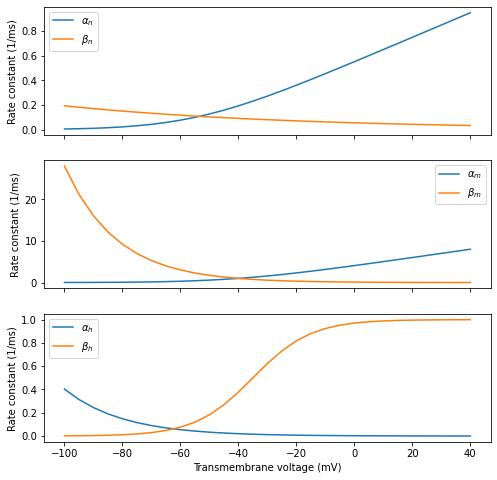

In [5]:
# The following function creates a figure with three subplots. We can access the subplots by using
# the returned list `axes`.
fig, axes = plt.subplots(nrows=3, sharex=True, sharey=False, figsize=(8, 8))
axes[0].plot(Vclamp, alpha_n, label='$\\alpha_n$')
axes[0].plot(Vclamp, beta_n, label='$\\beta_n$')
axes[0].legend(loc='upper left')
#axes[0].set_xlabel('Transmembrane voltage (mV)')
axes[0].set_ylabel('Rate constant (1/ms)')

lines = axes[1].plot(Vclamp, alpha_m, Vclamp, beta_m)
axes[1].legend(lines, ['$\\alpha_m$', '$\\beta_m$'], loc='upper right')
#axes[1].set_xlabel('Transmembrane voltage (mV)')
axes[1].set_ylabel('Rate constant (1/ms)')

axes[2].plot(Vclamp, alpha_h, Vclamp, beta_h)
axes[2].legend(['$\\alpha_h$', '$\\beta_h$'], loc='upper left')
axes[2].set_xlabel('Transmembrane voltage (mV)')
axes[2].set_ylabel('Rate constant (1/ms)')

plt.show()